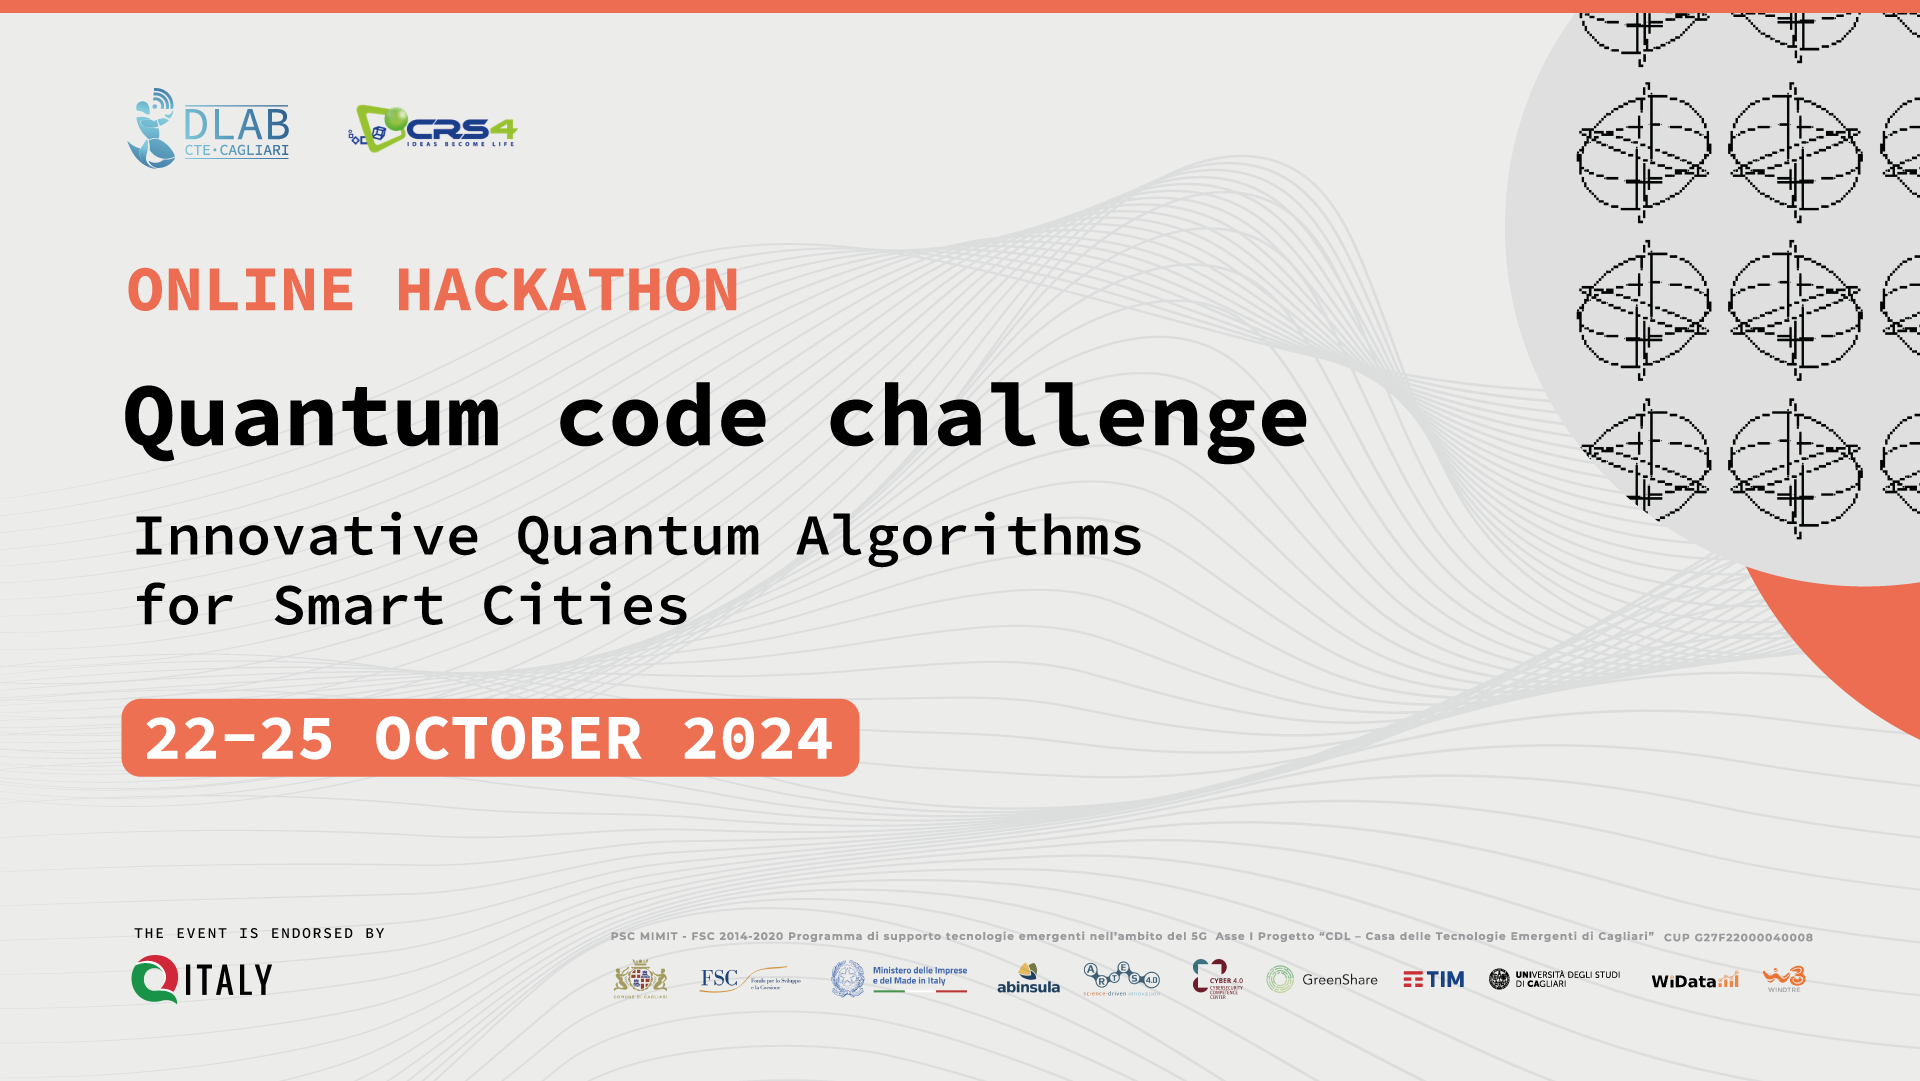

# 12 - Shor difende la smart city

## Scenario

Il sindaco ti chiede di verificare la crittografia attualmente disponibile a protezione dei dati sensibili. Gli obiettivi sono: 
- Testare la vulnerabilità delle infrastrutture crittografiche
- Dimostrare la necessità di aggiornare i sistemi a crittografia post-quantum
- Valutare i rischi di sicurezza dei sistemi IoT


Questo esempio pratico vuole proporre un attacco di Shor semplificato su una piccola chiave RSA, come potrebbe essere utilizzato in un contesto di sicurezza di una smart city.

Ti viene fornita una chiave dimostrativa per scopi dimostrativi, dato che con chiavi reali servirebbe un computer quantistico molto potente
L'implementazione include:

- Registri quantistici per il conteggio e l'ausiliario
- Analisi delle misurazioni per trovare il periodo
- Moltiplicazione modulare controllata (semplificata)

Da notare che questa è una implementazione didattica e semplificata. In un contesto reale le chiavi RSA sono molto più grandi (2048+ bit), l'implementazione richiederebbe molti più qubits e sarebbero necessarie tecniche di correzione degli errori.

Ti viene fornita la chiave pubblica RSA da attaccare, devi **scrivere il metodo _quantum_period_finding** in cui si scrive il circuito che effettua 
Quantum Period Finding con QFT tipico dell'Algoritmo di Shor. Ti diamo il metodo semplificato per la moltiplicazione modulare controllata.

In [1]:
import os
from client_grader import * 
os.environ["TEAM_NAME"] = "pippo"
grader=Crs4GraderClient()


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.circuit.library import QFT
import numpy as np
from math import gcd
from fractions import Fraction

class ShorAttack:
    def __init__(self, N):
        """
        Inizializza l'attacco di Shor per fattorizzare N
        N: numero da fattorizzare (prodotto di due primi)
        """
        self.N = N
        self.n = N.bit_length()
        
    def _quantum_period_finding(self, a):
        """
        Implementa il finding del periodo usando un circuito quantistico
        a: base per l'esponenziazione modulare
        """
        # Registri quantistici
        n_count = 2 * self.n  # Registro di conteggio
        qr_count = QuantumRegister(n_count, 'count')
        qr_aux = QuantumRegister(self.n, 'aux')
        cr = ClassicalRegister(n_count, 'c')
        
        ### scrivi il tuo codice qui
        
        # Circuito quantistico
        
        
        # Sovrapposizione iniziale
        
            
        # Funzione periodica quantistica
        
            
        # QFT inversa
        
        
        # Misura
        

        # Esegui il circuito
        
        ###### fine del tuo codice
        
        # Analizza i risultati per trovare il periodo
        measurements = sorted(counts.items(), key=lambda x: x[1], reverse=True)
        return self._analyze_measurements(measurements, n_count)
    
    def _controlled_mod_mult(self, a):
        """
        Crea un gate controllato per la moltiplicazione modulare
        a: moltiplicatore
        """
        n = self.n
        qc = QuantumCircuit(n + 1)
        
        # Implementazione semplificata della moltiplicazione modulare controllata
        for i in range(n):
            if (a & (1 << i)) != 0:
                qc.cx(0, i + 1)
        
        return qc
        
    def _analyze_measurements(self, measurements, n_count):
        """
        Analizza le misurazioni per trovare il periodo
        """
        for measurement, _ in measurements[:5]:  # Analizza i 5 risultati più frequenti
            phase = measurement / (1 << n_count)
            frac = Fraction(phase).limit_denominator(self.N)
            if frac.denominator > 1:
                return frac.denominator
        return None
    
    def attack(self):
        """
        Esegue l'attacco di Shor completo
        """
        print(f"Attacco di Shor su RSA-{self.n} (N = {self.N})")
        r=0
        x=0
        # Scegli una base casuale
        a = 2
        while a < self.N:
            if gcd(a, self.N) != 1:
                p = gcd(a, self.N)
                q = self.N // p
                return p, q, r, x
            
            print(f"Tentativo con base a = {a}")
            
            # Trova il periodo
            r = self._quantum_period_finding(a)
            print(f"Tentativo con base a = {a}, found r={r}")
            if r is None or r % 2 != 0:
                a += 1
                continue
                
            # Calcola i fattori potenziali
            x = pow(a, r//2, self.N)
            print(f"Tentativo con base a = {a}, found x={x}")
            p = gcd(x + 1, self.N)
            q = gcd(x - 1, self.N)
            
            if p * q == self.N:
                return p, q, r, x
                
            a += 1
        
        return None, None, None, None

In [ ]:
# Esempio di utilizzo per una chiave RSA piccola (per dimostrazione)

# Chiave RSA-8 di esempio (molto piccola per dimostrazione)
N=203
    
print("Simulazione attacco a smart city:")
print(f"Chiave RSA pubblica (N): {N}")
    
# Esegui l'attacco
shor = ShorAttack(N)
found_p, found_q, found_r, found_x = shor.attack()
    
if found_p and found_q:
    print(f"\nAttacco riuscito!")
    print(f"Fattori trovati: {found_p} e {found_q}")
    print(f"Verifica: {found_p} * {found_q} = {N}")
    print(f"Valori di r e x: {found_r} , {found_x} ")
else:
        print("\nAttacco fallito")

### Q12.1
**Inserisci qui per l'attacco riuscito i valori di p, q, r e x.**

In [ ]:
solution = []

grader.check_submission(solution, '12.1')
result = grader.submit_exercise(solution, '12.1')
print(result)


Dopo qualche minuto, controlla [la classifica live](https://account.qbraid.com/hackathons/2024/crs4) per vedere come si classifica il tuo team!

# 👉 [La classifica in tempo reale](https://account.qbraid.com/hackathons/2024/crs4)